## S&P 500 Predictions

In this project I will make predictions on the S&P 500.

This will require:
   - scraping data
   - cleaning and analyzing the data
   - splitting data, training a model, and making predictions
   - evaluating accuaracy of those predictions

First, I will import 'yfinance' which is a Yahoo Finance API and that will allow me to get the data need for this project.

In [267]:
import yfinance as yf
import pandas as pd

In [268]:
sp = yf.Ticker("^GSPC") #specifying the ticker and time frame of data needed
sp = sp.history(start = '1990-01-01', end = '2023-02-07')
sp.to_csv("sp500.csv") #saving the data to a CSV 

In [269]:
sp

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,0.0,0.0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,0.0,0.0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,0.0,0.0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,0.0,0.0
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,0.0,0.0
...,...,...,...,...,...,...,...
2023-01-31 00:00:00-05:00,4020.850098,4077.159912,4020.439941,4076.600098,4679320000,0.0,0.0
2023-02-01 00:00:00-05:00,4070.070068,4148.950195,4037.199951,4119.209961,4856930000,0.0,0.0
2023-02-02 00:00:00-05:00,4158.680176,4195.439941,4141.879883,4179.759766,5624360000,0.0,0.0


In [270]:
del sp["Dividends"]
del sp["Stock Splits"]  #delete useless data

<AxesSubplot:xlabel='Date'>

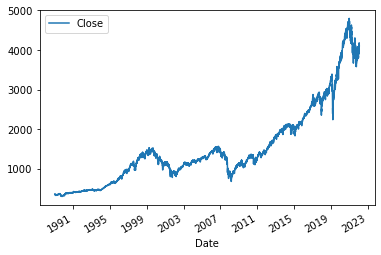

In [271]:
sp.plot.line(y="Close", use_index=True) #visualize overall data to gain perspective and insight

#### Since I am trying to predict future prices, I will make a new column which shows the close of the next day. This can be done by taking the close prices and shifting them up one space. I will also make a new column that simplifies that information and shows whether or not the close of the following day was higher by marking a '0' for false and '1' for true.

In [272]:
sp["Tomorrow"] = sp["Close"].shift(-1)

In [273]:
sp["Target"] = (sp["Tomorrow"] > sp["Close"]).astype(int)

In [274]:
sp

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-01-31 00:00:00-05:00,4020.850098,4077.159912,4020.439941,4076.600098,4679320000,4119.209961,1
2023-02-01 00:00:00-05:00,4070.070068,4148.950195,4037.199951,4119.209961,4856930000,4179.759766,1
2023-02-02 00:00:00-05:00,4158.680176,4195.439941,4141.879883,4179.759766,5624360000,4136.479980,0


In [275]:
from sklearn.ensemble import RandomForestClassifier #initial model

rfc = RandomForestClassifier(n_estimators=200, min_samples_split=100, random_state=1)

train = sp.iloc[:-100]
test = sp.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
rfc.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=200, random_state=1)

In [276]:
from sklearn.metrics import precision_score

preds = rfc.predict(test[predictors])
preds = pd.Series(preds, index=test.index) #turning an array into a series
precision_score(test["Target"], preds) #initial model results in a weak precision score

0.3246753246753247

<AxesSubplot:xlabel='Date'>

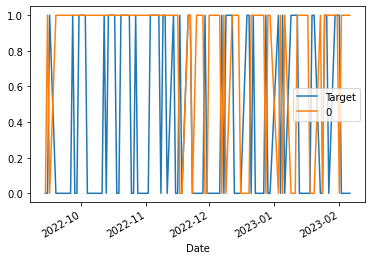

In [277]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [278]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [279]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [280]:
predictions = backtest(sp, rfc, predictors)

In [281]:
predictions["Predictions"].value_counts()

0    3325
1    2514
Name: Predictions, dtype: int64

In [282]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5266507557677009

In [283]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.533996
0    0.466004
Name: Target, dtype: float64

## Making New Predictors

To increase accuracy, I will add more predictors. These new predictors will be rolling averages and ratio between rolling averages and close prices. This will be done below.

In [284]:
rollings = [2,5,60,250,1000]
new_predictors = []

for rolling in rollings:
    rolling_averages = sp.rolling(rolling).mean()
    ratio_column = f"Close_Ratio_{rolling}"
    sp[ratio_column] = sp["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{rolling}"
    sp[trend_column] = sp.shift(1).rolling(rolling).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [285]:
sp

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31 00:00:00-05:00,4020.850098,4077.159912,4020.439941,4076.600098,4679320000,4119.209961,1,1.007268,1.0,1.006987,3.0,1.036316,28.0,1.007147,111.0,1.114027,537.0
2023-02-01 00:00:00-05:00,4070.070068,4148.950195,4037.199951,4119.209961,4856930000,4179.759766,1,1.005199,2.0,1.012361,4.0,1.045379,29.0,1.018147,111.0,1.125248,537.0
2023-02-02 00:00:00-05:00,4158.680176,4195.439941,4141.879883,4179.759766,5624360000,4136.479980,0,1.007296,2.0,1.021252,4.0,1.058913,29.0,1.033418,112.0,1.141344,537.0


In [286]:
sp = sp.dropna(subset=sp.columns[sp.columns != "Tomorrow"])

In [287]:
sp

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31 00:00:00-05:00,4020.850098,4077.159912,4020.439941,4076.600098,4679320000,4119.209961,1,1.007268,1.0,1.006987,3.0,1.036316,28.0,1.007147,111.0,1.114027,537.0
2023-02-01 00:00:00-05:00,4070.070068,4148.950195,4037.199951,4119.209961,4856930000,4179.759766,1,1.005199,2.0,1.012361,4.0,1.045379,29.0,1.018147,111.0,1.125248,537.0
2023-02-02 00:00:00-05:00,4158.680176,4195.439941,4141.879883,4179.759766,5624360000,4136.479980,0,1.007296,2.0,1.021252,4.0,1.058913,29.0,1.033418,112.0,1.141344,537.0


## Final Model and Predictions

Using the new predictors, I will run a final model and get predictions.

In [295]:
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)


In [296]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1 #change threshold: if probability of higher prices is 60%, then the model will return that the price will go up.
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [297]:
predictions = backtest(sp, rfc, new_predictors)

In [301]:
predictions["Predictions"].value_counts()

0.0    4026
1.0     813
Name: Predictions, dtype: int64

In [302]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.544121
0    0.455879
Name: Target, dtype: float64

In [303]:
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,1.0
2003-11-18 00:00:00-05:00,1,1.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,1.0
...,...,...
2023-01-31 00:00:00-05:00,1,0.0
2023-02-01 00:00:00-05:00,1,0.0
2023-02-02 00:00:00-05:00,0,0.0


In [304]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5694956949569495

## Final model has improved significantly as initial model returned a precision score of roughly 0.325 and now that has improved to 0.57.